# 3.1线性神经网络
### 3.1.1 线性回归的基本元素
&emsp;&emsp;举个例子：根据房屋的面积(平方米)和房龄(年)来估计房屋价格(元)，需要收集一个数据集，该数据集称为训练数据集(training dataset)或训练集(training set)。
每行数据(比如一次房屋交易所对应的数据)成为数据样本(sample)，也可以称为数据点(data point)或数据实例(data instance)。
试图预测的目标(比如预测房屋价格)称为标签(label)或目标(target)。
预测所依据的自变量(面积和房龄)称为特征(feature)或协变量(covariate)。
通常，我们使用n来表示数据集中的样本数。


#### 1.线性模型
&emsp;&emsp;线性假设是指目标(房屋价格)可以表示为特征(面积和房龄)的加权和，如下式:
<center>price=w<sub>area</sub>*area+w<sub>age</sub>*age+b</center>
&emsp;&emsp;w<sub>area</sub>和w<sub>age</sub>称为权重，权重决定了每个特征对预测值的影响，b称为偏置(bias)、偏移量(offset)或截距(intercept)。
&emsp;&emsp;在机器学习领域中，通常使用高维数据集，建模时用线性代数表示法会更方便。当我们的输入有d个特征时，将预测结果y^表示为：
<center>y^=w<sub>1</sub>*x<sub>1</sub>+w<sub>2</sub>*x<sub>2</sub>+...w<sub>d</sub>*x<sub>d</sub></center>
&emsp;&emsp;将所有的特征放在x∈R_d中，并将所有权重放入w∈R_d中，我们可以用点积形式来简洁地表示模型
<center>y^=w<sup>T</sup>x+b</center>
&emsp;&emsp;虽然给定x预测y的最佳模型是线性的，但是考虑到误差带来的影响，还要加入一个噪点。


##### 2.损失函数(loss function)
&emsp;&emsp;当我们开始考虑如何用模型拟合(fitting)数据之前，我们需要确定拟合程度的度量。<b>损失函数</b>能够量化目标的实际值与预测值之间的差距，通常选择非负数作为损失。<br>
&emsp;&emsp;回归问题中最常用的损失函数是平方误差函数。当样本i预测值为y^_i，其相应的真实标签为y_i时，平方误差可以定义为以下公式：
<center>l<sup>(i)</sup>(w,b)=1/2(y^<sup>(i)</sup>-y<sup>(i)</sup>)<sup>2</sup> (常数1/2是为了方便求导)</center>
&emsp;&emsp;由于平方误差函数中的二次方项，估计值y^_i和观测值y_i之间较大的差距将导致更大的损失。为了度量模型在整个数据集上的预测质量，需要计算在训练集n个样本上的损失均值(等价于求和)：
<center>L(w,b)=1/n ∑ l<sup>(i)</sup>(w,b)=i/n ∑<sup>n</sup><sub>i=1</sub>1/2(w<sup>T</sup>x<sup>(i)</sup>+b-y<sup>(i)</sup>)<sup>2</sup></center>





#### 3.解析解(analytical solution)
&emsp;&emsp;线性回归的解可以用一个公式简单地表示，这类解叫做<b>解析解</b>。先将偏置b合并到参数w中(再包含所有参数的矩阵中附加一列)。预测问题就是最小化||y-Xw||<sup>2</sup>。这再损失平面上只有一个临界点，对应整个区域的损失极小值点。将损失关于w的导数设为0，得到解析解：
<center>w<sup>*</sup>=(X<sup>T</sup>X)<sup>-1</sup>X<sup>T</sup>y</center>
&emsp;&emsp;但是只有线性回归这样的简单问题有解析解，因为解析解对问题的限制很严格，所以无法广泛用于深度学习中。

#### 4.随机梯度下降(gradient descent)
&emsp;&emsp;这种方法几乎可以优化所有深度学习模型，它通过不断地在损失函数递减的方向上更新参数来降低误差。
梯度下降最简单的用法就是计算损失函数(数据集中所有样本的损失均值)关于模型参数的导数(在这里可以称为梯度)。但是因为每次更新参数之前都必须遍历整个数据集，因此，我们通常会在每次需要计算更新的时候，随机抽取一小批样本，这种变体叫做<b>小批量随机梯度下降</b>。
每次迭代中，先随机抽取一个小批量<b>B</b>，它是由固定数量的训练样本组成的；然后，计算小批量的损失均值关于模型参数的导数(也可称为梯度)；最后，将梯度乘以一个预先确定的正数η，并从当前参数的值中减去。
&emsp;&emsp;用下面的公式来表达这一更新过程(∂表示偏导数)：
<center>(w,b)⬅(w,b)-η/|B| Σ<sub>i∈B</sub>∂<sub>(w,b)</sub>l<sup>(i)</sup>(w,b)</center>
&emsp;&emsp;总结一下，算法的步骤如下：(1)初始化建模参数的值，如随机初始化；(2)从数据集中随机抽取小批量样本且在负梯度方向上更新参数，并不断迭代这一步骤。对于平方损失和仿射变换，我们可以明确地写成如下形式：
<center>w⬅w-η/|B| Σ<sub>i∈B</sub>∂<sub>w</sub>l<sup>(i)</sup>(w,b)=w-η/|B| Σ<sub>i∈B</sub>x<sup>(i)</sup>(w<sup>T</sup>x<sup>(i)</sup>+b-y<sup>(i)</sup>)</center>
<center>b⬅b-η/|B| Σ<sub>i∈B</sub>∂<sub>b</sub>l<sup>(i)</sup>(w,b)=w-η/|B| Σ<sub>i∈B</sub>(w<sup>T</sup>x<sup>(i)</sup>+b-y<sup>(i)</sup>)</center>
&emsp;&emsp;以上的w和x都是向量。在这里，|B|表示每个小批量中的样本数，也成为<b>批量大小</b>(batch size)，η表示<b>学习率</b>(learning rate)。二者的值通常是预先手动指定，而不是通过模型训练得到的。这些可以调整但不在训练过程中更新的参数称为<b>超参数</b>(hyperparameter)。<b>调参</b>(hyperparameter tuning)是选择超参数的过程。超参数通常是我们通过训练迭代结果来调整的，而训练迭代结果是在独立的<b>验证数据集</b>(validation dataset)上评估得到的。
在训练了预先确定的若干迭代次后(或者直到满足其他停止条件后)，我们记录下模型参数的估计值，表示为w^,b^。但是无论使用任何函数，估计值也不会使损失值真正地达到最小值，应为算法会使损失向着最小值缓慢收敛，但不能在有限的步数内非常精确地达到最小值。
对于深度神经网络这样复杂的模型来说，损失平面上通常包含多个最小值，深度学习实践者很少会花费大力气寻找这样一组参数，使得训练集上的损失达到最小值。事实上，更难做到的是找到一组参数，这组参数能够在我们从未见过的数据上实现较小的损失，这一挑战称为<b>泛化</b>(generalization)。

#### 5.用模型进行预测
&emsp;&emsp;给定”已学习“的线性回归模型w^<sup>T</sup>x+b^，现在我们可以通过房屋面积x<sub>1</sub>和房龄x<sub>2</sub>来估计一个(未包含在训练数据据中的)新的房屋价格。给定特征的情况下估计目标的过程通常称为<b>预测</b>(prediction)或<b>推断</b>(inference)。
这本书坚持使用“预测”这个词。

### 3.1.2 向量化加速
&emsp;&emsp;在训练我们的模型的时候，我们经常希望能够同时处理整个小批量的样本。为了实现这一点，需要我们对计算进行向量化，从而利用线性代数库，而不是在python中编写开销巨大的for循环。

In [8]:
%matplotlib inline
import math
import time
import numpy as np
import torch
from d2l import torch as d2l

&emsp;&emsp;比较一下，实例化两个全为1的10000维向量，方法1使用python的for循环遍历向量，方法2将依赖对+的调用。

In [9]:
n = 10000
a = torch.ones(n)
b = torch.ones(n)

&emsp;&emsp;在本书中将频繁地进行运行时间的基准测试，因此定义一个计时器。

In [10]:
class Timer:    #@save
    '''记录多次运行时间'''
    def __init__(self) -> None:
        self.times=[]
        self.start()

    def start(self):
        '''启动计时器'''
        self.tik = time.time()

    def stop(self):
        '''停止计时器并将事件记录在列表中'''
        self.times.append(time.time()-self.tik)
        return self.times[-1]
    
    def avg(self):
        '''返回平均时间'''
        return sum(self.times)/len(self.times)
    
    def sum(self):
        '''返回时间总和'''
        return sum(self.times)
    
    def cunsum(self):
        '''返回累计时间'''
        return np.array(self.times).cunsum().tolist()

&emsp;&emsp;现在可以对工作负载进行基准测试。<br>
&emsp;&emsp;1.for循环

In [11]:
c = torch.zeros(n)
timer = Timer()
for i in range(n):
    c[i]=a[i]+b[i]
f'{timer.stop():.5f}sec'

'0.06247sec'

&emsp;&emsp;2.使用重载的+运算符

In [12]:
timer.start()
d = a + b
f'{timer.stop():.5f}sec'

'0.00000sec'

&emsp;&emsp;结果很明显，第二种方法比第一种要快得多。向量化代码通常会带来数量级的加速。另外，我们将更多的数学运算放到库里，而无需自己编写如此多的计算，从而减少了计算出错的可能。

### 3.1.3 正态分布与平方损失
接下来，我们通过对噪声分布的假设来解读平方损失目标函数。
下面我们定义一个python函数来计算正态分布。

In [13]:
def normal(x,mu,sigma):
    p = 1/(math.sqrt(2*math.pi*sigma**2))
    return p*np.exp(-0.5/sigma**2*(x-mu)**2)

&emsp;&emsp;我们现在进行可视化正态分布。

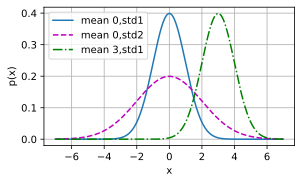

In [14]:
# 再次使用numpy进行可视化
x = np.arange(-7,7,0.01)

# 均值和标准差对
params = [(0,1),(0,2),(3,1)]
d2l.plot(x,[normal(x,mu,sigma) for mu,sigma in params],xlabel='x',ylabel='p(x)',figsize=(4.5,2.5),legend=[f'mean {mu},std{sigma}' for mu,sigma in params])

&emsp;&emsp;均方误差损失函数(简称均方损失)可以用于线性回归的一个原因是：我们假设观测中包含噪点，其噪点服从正态分布。噪点正态分布如下式：
<center>y=w<sup>T</sup>x+b+ε</center>
&emsp;&emsp;其中，ε~M(0,σ<sup>2</sup>)
&emsp;&emsp;因此可以写出通过给定的x观测到特定y的<b>似然</b>(likehood)：
<center>P(y|x)=1/√2πσ<sup>2</sup> exp(-1/2σ<sup>2</sup>(y-w<sup>T</sup>x-b)<sup>2</sup>)</center>
&emsp;&emsp;现在，根据极大似然估计法，参数w和b的最优解是使整个数据集的似然最大的值：
<center>P(y|X)=Π<sup>n</sup><sub>i=1</sub>p(y<sup>(i)</sup>|x<sup>(i)</sup>)</center>
&emsp;&emsp;通过最大似然对数来化简，优化通常是指最小化，改为最小化负对数似然-log P(y|X)，这里省略。在高斯噪点的假设中，最小化均方误差等价于对线性模型的极大似然估计。

#### 3.1.4 从线性回归到深度网络
##### 1.神经网络图
<img src="../image/demo3-2.png" width=300px height=auto alt="神经网络图">

&emsp;&emsp;线性回归是单层神经网络。<br>
&emsp;&emsp;在图中所示的神经网络(只显示输入到输出，隐去了权重和偏置的值)中。输入为x<sub>1</sub>,x<sub>2</sub>,…x<sub>d</sub>，因此输入层中的输入数或称为<b>特征维度</b>(feature dimensionality)为d。网络的输出为7，输出层中的输出数是1.需要注意的是。输入值都是已经给定的，并且只有一个计算神经元。由于模型重点在发生计算的地方，因此通常我们在计算层数的时候不考虑输入层， 即：线性回归模型可以看作仅由单个人工神经元组成的神经网络，或者单层神经网络。
对于线性回归，每个输入都与每个输出(在本例中只有一个输出)连接，我们将这种变换(图中的输出层) 称为<b>全连接层</b>(fully-connected layer)或称为<b>稠密层</b>(dense layer)，下一章将会详细讨论这些层组成的网络。